<a href="https://colab.research.google.com/github/Ldave01/BA-Group-Project/blob/main/BA_project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BUSINESS PROBLEM

Context

Une banque souhaite fournir un service client de meilleure qualité pour protéger les actifs financiers des clients. La banque a reçu plusieurs plaintes concernant des fraudes par carte de crédit de la part de leurs clients et les médias rapportent régulièrement sur la façon dont les clients de la banque perdent de grosses sommes d'argent et la banque ne fait rien pour l'arrêter. Cela a un impact à la fois sur l'expérience des clients et leur part de marché. La haute direction demande une plongée profonde dans cette question.
Vous venez d'être embauché en tant qu'analyste commercial pour la banque, et ils vous ont fourni 6 mois de données disponibles (les étapes 0 à 179 se réfèrent aux dates). Ils souhaitent que vous partagiez certaines informations en utilisant les fonctionnalités du fichier pour déterminer si vous pouvez voir un schéma pour les transactions frauduleuses. Ils s'attendent à ce que vous fournissiez des suggestions sur la façon de 
résoudre le problème.


Des questions

1. Montrez un résumé de la variable que vous étudiez (variable cible). Tracez le graphique approprié pour représenter ces données.(ok)
2. Calculer des statistiques récapitulatives à partir des données.(Statistiques descriptive)(ok)
3. Calcul des tendances quotidiennes des transactions pour différentes catégories de variables.(Transaction by sex(0k), Transaction by age, transaction  by category transaction,nan ki men ki machann ou jwenn plis fraud)
4. Que pensez-vous des transactions frauduleuses ? Y a-t-il un seuil de
dépensé? Existe-t-il un « genre » spécifique avec une probabilité plus élevée d'être victime d'un acte frauduleux ? ou « catégorie » de transactions plus susceptibles d'être frauduleuses ?
5. Quelles sont vos recommandations à la direction de la banque et décrivez comment votre solution permettra-t-elle de regagner la confiance des clients ?


# DATA ANALYSIS STEP

##  Downloading Librairies

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt
import io

## Data Retrieval

## Data cleansing

In [142]:
url="https://raw.githubusercontent.com/Ldave01/BA-Group-Project/main/file1.csv"
data=pd.read_csv(url)
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [143]:
#Function to remove unwanted characters from column value
def remove_char(dataset,cols=[],new={}):
  dataset[cols] = dataset[cols].replace(new, regex=True)
  return dataset.head()

In [144]:
remove_char(data,cols=['customer','age','gender','merchant','category'],new={"'":'', "es_":''})

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,'28007',M348934600,'28007',transportation,4.55,0
1,0,C352968107,2,M,'28007',M348934600,'28007',transportation,39.68,0
2,0,C2054744914,4,F,'28007',M1823072687,'28007',transportation,26.89,0
3,0,C1760612790,3,M,'28007',M348934600,'28007',transportation,17.25,0
4,0,C757503768,5,M,'28007',M348934600,'28007',transportation,35.72,0


In [145]:
# selected specific columns
cols = ['step','customer','age','gender','merchant','category','amount','fraud']
data = data.loc[:,cols]

In [146]:
data.head(2)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,transportation,4.55,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0


In [147]:
data.duplicated().sum()

0

In [148]:
data['amount']=data['amount']*1000

In [149]:
data['amount']

0          4550.0
1         39680.0
2         26890.0
3         17250.0
4         35720.0
           ...   
594638    20530.0
594639    50730.0
594640    22440.0
594641    14460.0
594642    26930.0
Name: amount, Length: 594643, dtype: float64

In [150]:
#check unique values from gender column
data.gender.unique()

array(['M', 'F', 'E', 'U'], dtype=object)

In [151]:
# Replace gender initial 
data['gender']=data['gender'].replace(['M','F','E','U'],['Male','Female','Gender_E','Gender_Unkwon'])

In [152]:
data.gender.unique()

array(['Male', 'Female', 'Gender_E', 'Gender_Unkwon'], dtype=object)

In [153]:
data.head(10)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,Male,M348934600,transportation,4550.0,0
1,0,C352968107,2,Male,M348934600,transportation,39680.0,0
2,0,C2054744914,4,Female,M1823072687,transportation,26890.0,0
3,0,C1760612790,3,Male,M348934600,transportation,17250.0,0
4,0,C757503768,5,Male,M348934600,transportation,35720.0,0
5,0,C1315400589,3,Female,M348934600,transportation,25810.0,0
6,0,C765155274,1,Female,M348934600,transportation,9100.0,0
7,0,C202531238,4,Female,M348934600,transportation,21170.0,0
8,0,C105845174,3,Male,M348934600,transportation,32400.0,0
9,0,C39858251,5,Female,M348934600,transportation,35400.0,0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


In [155]:
#Function to check for null values in Dataset
def check_null(dataset):
    null=data.isna().sum()
    return null

In [156]:
check_null(data)

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

In [157]:
data.gender.value_counts(normalize=True)

Female           0.545815
Male             0.451338
Gender_E         0.001981
Gender_Unkwon    0.000866
Name: gender, dtype: float64

In [158]:
data.fraud.value_counts().describe()

count         2.000000
mean     297321.500000
std      410293.760036
min        7200.000000
25%      152260.750000
50%      297321.500000
75%      442382.250000
max      587443.000000
Name: fraud, dtype: float64

In [159]:
data.category.value_counts(normalize=True)

transportation        0.849449
food                  0.044151
health                0.027131
wellnessandbeauty     0.025370
fashion               0.010854
barsandrestaurants    0.010717
hyper                 0.010255
sportsandtoys         0.006730
tech                  0.003986
home                  0.003340
hotelservices         0.002933
otherservices         0.001534
contents              0.001488
travel                0.001224
leisure               0.000839
Name: category, dtype: float64

In [160]:
data.age.value_counts(normalize=True)

2    0.314996
3    0.247427
4    0.183345
5    0.105344
1    0.097758
6    0.045025
0    0.004123
U    0.001981
Name: age, dtype: float64

In [161]:
#Function to check null values in Dataset
def check_null(data):
    null=data.isna().sum()/data.shape[0]
    return null

In [162]:
check_null(data)

step        0.0
customer    0.0
age         0.0
gender      0.0
merchant    0.0
category    0.0
amount      0.0
fraud       0.0
dtype: float64

In [163]:
def dataset_cardinalite(dataset,is_number=True):
  # kreye yon diksyon
  my_dict = dict()
  # seleksyone chak kolòn
  for col in dataset.columns:
    # sovgade kadinailte avèk valè inik yo nan kolòn sa
    if is_number:
      my_dict[col] = dataset[col].nunique()
    else:
       my_dict[col] = dataset[col].unique()
  # retounen diksyonè sila
  return my_dict

In [164]:
dataset_cardinalite(data)

{'age': 8,
 'amount': 23767,
 'category': 15,
 'customer': 4112,
 'fraud': 2,
 'gender': 4,
 'merchant': 50,
 'step': 180}

In [93]:
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [165]:
data.head(2)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,Male,M348934600,transportation,4550.0,0
1,0,C352968107,2,Male,M348934600,transportation,39680.0,0


## Data Processing

Qualitative variables -> Gender, Category, Fraud, Merchant

Quantitative variables -> Amount,

## Data Analysis Univariate

### Data Analysis Univariate for Qualitative Variable

Qualitative variables -> Gender, Category, Fraud, Age

In [95]:
def generate_barchart(data="", title ="",abs_value ="",rel_value="",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [96]:
def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result

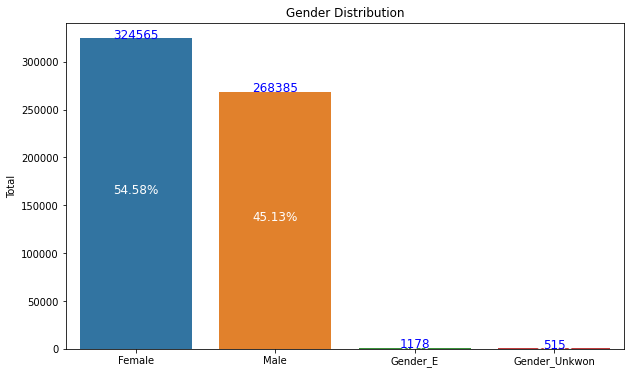

,Total,Percent
Female,324565,0.545815
Male,268385,0.451338
Gender_E,1178,0.001981
Gender_Unkwon,515,0.000866


In [102]:
prob_category(data, col='gender', show_plot=True, title='Gender Distribution')

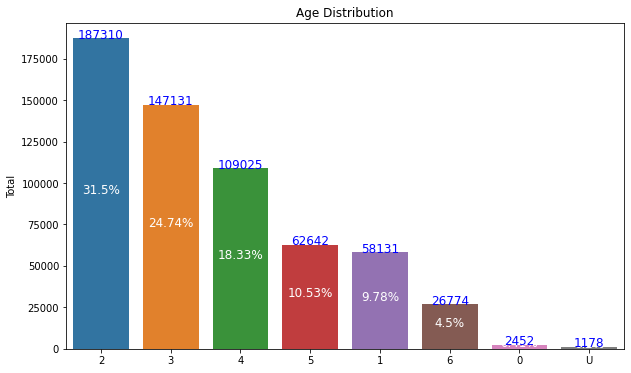

,Total,Percent
2,187310,0.314996
3,147131,0.247427
4,109025,0.183345
5,62642,0.105344
1,58131,0.097758
6,26774,0.045025
0,2452,0.004123
U,1178,0.001981


In [103]:
prob_category(data, col='age', show_plot=True, title='Age Distribution')

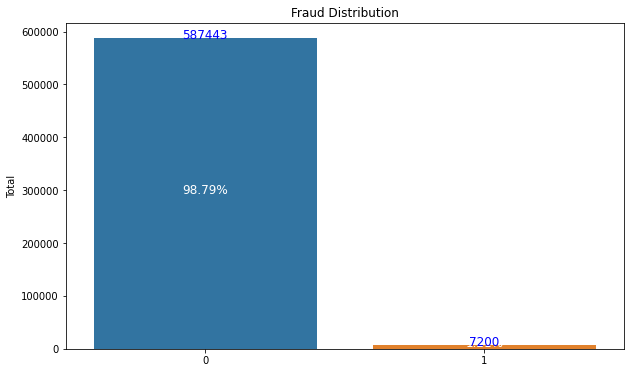

,Total,Percent
0,587443,0.987892
1,7200,0.012108


In [104]:
prob_category(data, col='fraud', show_plot=True, title='Fraud Distribution')

In [106]:
total_category=data.category.value_counts().to_frame()
total_category.rename(columns={'category':'Total'},inplace=True)
prc_total=data.category.value_counts(normalize=True).to_frame()
prc_total.rename(columns={'category':'Percent'},inplace=True)
result = pd.concat([prc_total,total_category],axis =1)

In [111]:
result

,Percent,Total
transportation,0.849449,505119
food,0.044151,26254
health,0.027131,16133
wellnessandbeauty,0.025370,15086
fashion,0.010854,6454
barsandrestaurants,0.010717,6373
hyper,0.010255,6098
sportsandtoys,0.006730,4002
tech,0.003986,2370
home,0.003340,1986


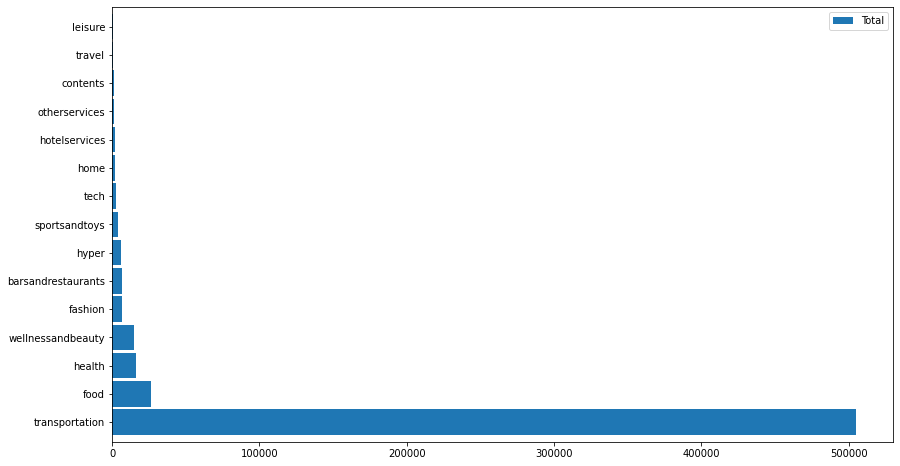

In [171]:
graph=total_category.plot(kind='barh', width=0.9)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

### Data Analysis Quantitative Univariate

Quantative variables -> Amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


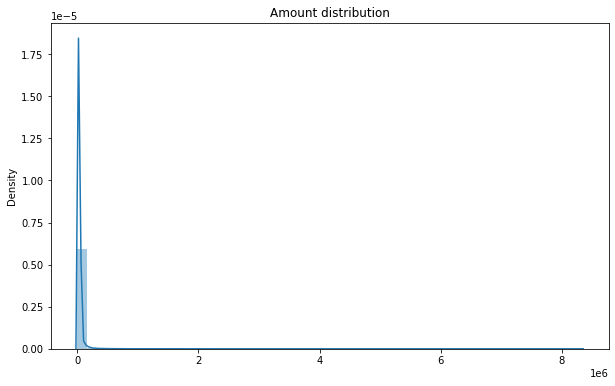

In [166]:
# Histogram with rugplot and kde 
plt.figure(figsize=(10,6))
sns.distplot(x=data["amount"],kde=True)
plt.title("Amount distribution")
plt.show()

Text(0.5, 1.0, 'Age Boxplot Distribution')

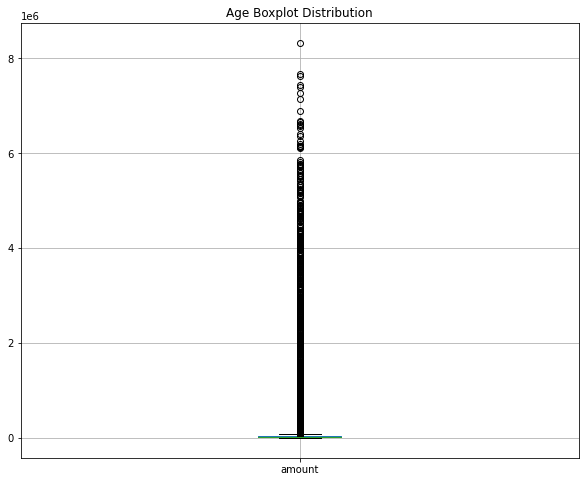

In [167]:
# Age Univariate Analysis
data.boxplot(column="amount",figsize=(10,8))
plt.title("Age Boxplot Distribution")


## Data Analysis Bivariate

#### Fraud vs Category

#### Fraud vs Genre

#### Fraud vs Age


In [185]:
fraud_category = pd.pivot_table(data=data,index="category",columns="fraud",values ="step",aggfunc="count")
fraud_category=fraud_category.sort_values(0, ascending=False)
fraud_category

fraud,0,1
category,,
transportation,505119.0,NaN
food,26254.0,NaN
health,14437.0,1696.0
wellnessandbeauty,14368.0,718.0
fashion,6338.0,116.0
barsandrestaurants,6253.0,120.0
hyper,5818.0,280.0
tech,2212.0,158.0
sportsandtoys,2020.0,1982.0


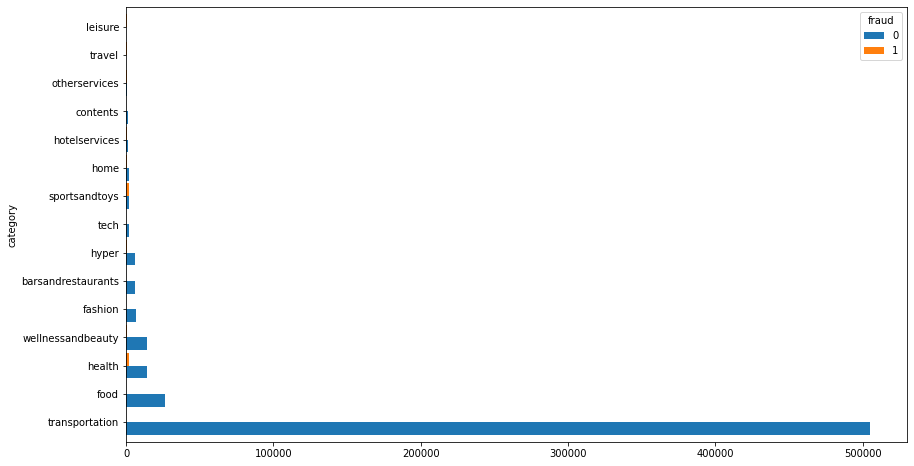

In [186]:
graph=fraud_category.plot(kind='barh', width=0.9)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

In [189]:
fraud_gender = pd.pivot_table(data=data,index="gender",columns="fraud",values ="step",aggfunc="count")
fraud_gender=fraud_gender.sort_values(0, ascending=False)
fraud_gender

fraud,0,1
gender,,
Female,319807.0,4758.0
Male,265950.0,2435.0
Gender_E,1171.0,7.0
Gender_Unkwon,515.0,NaN


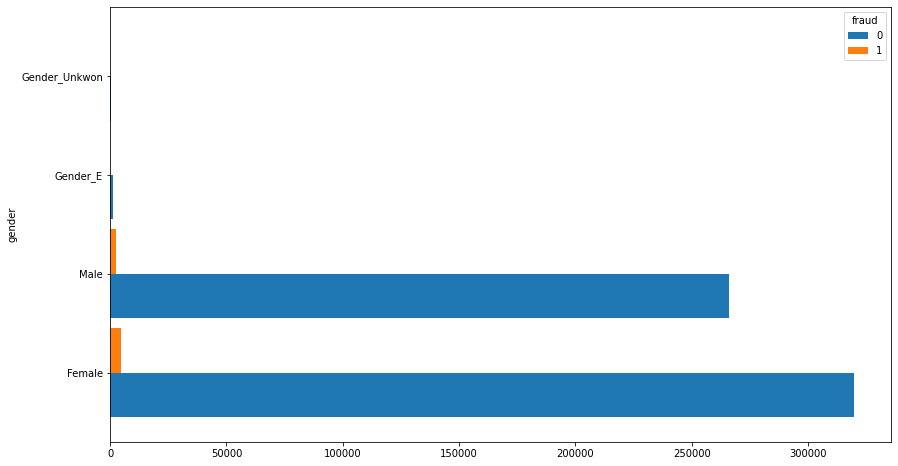

In [190]:
graph=fraud_gender.plot(kind='barh', width=0.9)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

In [191]:
fraud_age = pd.pivot_table(data=data,index="age",columns="fraud",values ="step",aggfunc="count")
fraud_age=fraud_age.sort_values(0, ascending=False)
fraud_age

fraud,0,1
age,,
2,184966,2344
3,145376,1755
4,107615,1410
5,61956,686
1,57442,689
6,26513,261
0,2404,48
U,1171,7


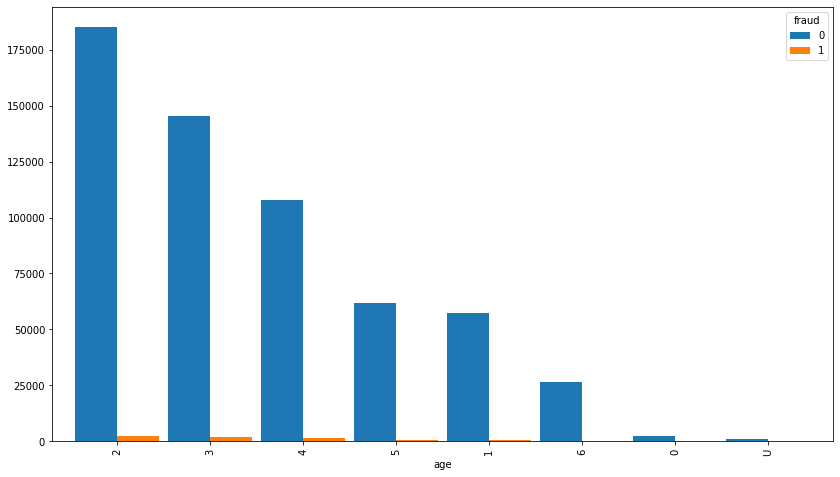

In [193]:
graph=fraud_age.plot(kind='bar', width=0.9)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)